In [26]:
import os
import sys

# Set FreeSurfer environment variables
os.environ["FREESURFER_HOME"] = "/Applications/freesurfer/7.4.1"
os.environ["SUBJECTS_DIR"] = os.environ["FREESURFER_HOME"] + "/subjects"
os.environ["FUNCTIONALS_DIR"] = os.environ["FREESURFER_HOME"] + "/sessions"
os.environ["FSFAST_HOME"] = os.environ["FREESURFER_HOME"] + "/fsfast"
os.environ["FSF_OUTPUT_FORMAT"] = "nii.gz"
os.environ["LOCAL_DIR"] = os.environ["FREESURFER_HOME"] + "/local"
os.environ["FSL_DIR"] = "/usr/local/fsl"
os.environ["FSL_BIN"] = os.environ["FSL_DIR"] + "/bin"
os.environ["PATH"] = f"{os.environ['FREESURFER_HOME']}/bin:{os.environ['FSFAST_HOME']}/bin:{os.environ['FSL_BIN']}:{os.environ['PATH']}"

# Optional MINC toolkit setup
if "NO_MINC" not in os.environ:
    os.environ["MINC_BIN_DIR"] = os.path.join(os.environ["FREESURFER_HOME"], "mni", "bin")
    os.environ["MINC_LIB_DIR"] = os.path.join(os.environ["FREESURFER_HOME"], "mni", "lib")
    os.environ["MNI_DIR"] = os.path.join(os.environ["FREESURFER_HOME"], "mni")
    os.environ["PATH"] = f"{os.environ['MINC_BIN_DIR']}:{os.environ['PATH']}"

# Optional: Set Perl library path for MINC toolkit
if "MNI_PERL5LIB" not in os.environ:
    mni_perl5lib = os.path.join(os.environ["FREESURFER_HOME"], "mni", "share", "perl5")
    os.environ["MNI_PERL5LIB"] = mni_perl5lib
    os.environ["PERL5LIB"] = mni_perl5lib

# Library paths for MacOS
if sys.platform == "darwin":
    misc_lib = os.path.join(os.environ["FREESURFER_HOME"], "lib", "misc", "lib")
    os.environ["DYLD_LIBRARY_PATH"] = f"{misc_lib}:{os.environ.get('DYLD_LIBRARY_PATH', '')}"

# Set up FSL environment
if "FSL_DIR" in os.environ:
    os.environ["FSLDIR"] = os.environ["FSL_DIR"]
    os.environ["FSLOUTPUTTYPE"] = "NIFTI_GZ"
    if "FSL_BIN" in os.environ:
        os.environ["PATH"] = f"{os.environ['FSL_BIN']}:{os.environ['PATH']}"

# Add FastSurferCNN directory to PYTHONPATH
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
os.environ["PYTHONPATH"] = f"{fastsurferdir}:{os.environ.get('PYTHONPATH', '')}"
sys.path.append(fastsurferdir)

# Verify the environment setup
print("Environment variables set for FreeSurfer:")
print("FREESURFER_HOME:", os.environ["FREESURFER_HOME"])
print("SUBJECTS_DIR:", os.environ["SUBJECTS_DIR"])
print("FSFAST_HOME:", os.environ["FSFAST_HOME"])
print("FSF_OUTPUT_FORMAT:", os.environ["FSF_OUTPUT_FORMAT"])
print("FSL_DIR:", os.environ.get("FSL_DIR"))
print("MINC_BIN_DIR:", os.environ.get("MINC_BIN_DIR"))
print("MINC_LIB_DIR:", os.environ.get("MINC_LIB_DIR"))
print("MNI_DIR:", os.environ.get("MNI_DIR"))
print("PYTHONPATH:", os.environ["PYTHONPATH"])
print("PATH:", os.environ["PATH"])
print("DYLD_LIBRARY_PATH:", os.environ.get("DYLD_LIBRARY_PATH"))
print("PERL5LIB:", os.environ.get("PERL5LIB"))


Environment variables set for FreeSurfer:
FREESURFER_HOME: /Applications/freesurfer/7.4.1
SUBJECTS_DIR: /Applications/freesurfer/7.4.1/subjects
FSFAST_HOME: /Applications/freesurfer/7.4.1/fsfast
FSF_OUTPUT_FORMAT: nii.gz
FSL_DIR: /usr/local/fsl
MINC_BIN_DIR: /Applications/freesurfer/7.4.1/mni/bin
MINC_LIB_DIR: /Applications/freesurfer/7.4.1/mni/lib
MNI_DIR: /Applications/freesurfer/7.4.1/mni
PYTHONPATH: /Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Proje

In [31]:
import os
import subprocess
import sys

# # Set FreeSurfer environment variables
# os.environ["FREESURFER_HOME"] = "/Applications/freesurfer/7.4.1"
# freesurfer_setup_script = os.path.join(os.environ["FREESURFER_HOME"], "SetUpFreeSurfer.sh")

# # Source the FreeSurfer setup script
# subprocess.run(f"source {freesurfer_setup_script}", shell=True, executable='/usr/local/bin/bash')

# Data directories
datadir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/OAS1_0001/mri"
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"

# Dynamic FastSurfer directories 
fastsurfercnndir = os.path.join(fastsurferdir, "FastSurferCNN")
reconsurfdir = os.path.join(fastsurferdir, "recon_surf")

# Add FastSurferCNN directory to PYTHONPATH
os.environ["PYTHONPATH"] = f"{fastsurferdir}:{os.environ.get('PYTHONPATH', '')}"
sys.path.append(fastsurferdir)

# # Verify if FastSurferCNN module can be imported
# try:
#     import FastSurferCNN.reduce_to_aseg as rta
#     print("FastSurferCNN module imported successfully")
# except ImportError as e:
#     print("Failed to import FastSurferCNN module:", e)

# Subject-specific variables
subject = "OAS_0001-2"
t1 = os.path.join(datadir, "t1.mgz")
sd = os.path.join(fastsurferdir, subject)

merged_segfile = os.path.join(sd, "mri", "fastsurfer.merged.mgz")
asegdkt_segfile = os.path.join(sd, "mri", "aparc.DKTatlas+aseg.deep.mgz")
asegdkt_statsfile = os.path.join(sd, "stats", "aseg+DKT.stats")
cereb_segfile = os.path.join(sd, "mri", "cerebellum.CerebNet.nii.gz")
cereb_statsfile = os.path.join(sd, "stats", "cerebellum.CerebNet.stats")
mask_name = os.path.join(sd, "mri", "mask.mgz")
conformed_name = os.path.join(sd, "mri", "orig.mgz")
norm_name = os.path.join(sd, "mri", "orig_nu.mgz")
seg_log = os.path.join(sd, "scripts", "deep-seg.log")
build_log = os.path.join(sd, "scripts", "build.log")
aseg_segfile = os.path.join(sd, "mri", "aseg.auto_noCCseg.mgz")

device = "auto"
viewagg = "auto"
batch_size = 1
threads = 4
python = "python3.10"
python_args = ["-s"]
allow_root = []

# Print to verify
print("FREESURFER_HOME:", os.environ.get("FREESURFER_HOME"))
print("PYTHONPATH:", os.environ.get("PYTHONPATH"))
print("sys.path:", sys.path)
print("Data Directory:", datadir)
print("FastSurfer Directory:", fastsurferdir)
print("FastSurferCNN Directory:", fastsurfercnndir)
print("ReconSurf Directory:", reconsurfdir)

def run_segmentation(t1, subject, threads, sd, allow_root=False):
    """
    Run the FastSurfer segmentation process.

    Args:
        t1 (str): Path to the T1-weighted MRI image file.
        subject (str): Subject ID.
        threads (int): Number of threads to use for parallel processing.
        sd (str): Output subject directory.
        allow_root (bool, optional): Allow running the script as root. Defaults to False.

    Raises:
        subprocess.CalledProcessError: If the segmentation process fails.
    """
    cmd = [
        python, *python_args,
        os.path.join(fastsurfercnndir, "run_prediction.py"),
        "--t1", t1,
        "--sid", subject,
        "--threads", str(threads),
        "--sd", fastsurferdir
    ]

    if allow_root:
        cmd.append("--allow_root")

    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print("Segmentation completed successfully.")
        print("stdout:", result.stdout)
        print("stderr:", result.stderr)
    except subprocess.CalledProcessError as e:
        print("Segmentation failed:")
        print(f"Command: {e.cmd}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.stdout}")
        print(f"Error: {e.stderr}")
        raise

def run_biasfield_correction(conformed_name, norm_name, asegdkt_segfile, threads):
    """
    Run the N4 bias field correction on the input MRI image.

    Args:
        conformed_name (str): Path to the conformed MRI image.
        norm_name (str): Path to the normalized MRI image.
        asegdkt_segfile (str): Path to the DKT atlas segmentation file.
        threads (int): Number of threads to use for parallel processing.

    Raises:
        subprocess.CalledProcessError: If the bias field correction fails.
    """
    cmd = [
        python,
        os.path.join(reconsurfdir, "N4_bias_correct.py"),
        "--in", conformed_name,
        "--rescale", norm_name,
        "--aseg", asegdkt_segfile,
        "--threads", str(threads)
    ]

    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print("Bias-field correction completed successfully.")
        print("stdout:", result.stdout)
        print("stderr:", result.stderr)
    except subprocess.CalledProcessError as e:
        print("Bias-field correction failed:")
        print(f"Command: {e.cmd}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.stdout}")
        print(f"Error: {e.stderr}")
        raise

def run_recon_surf(subject, sd, threads):
    """
    Run the recon-surf process.

    Args:
        subject (str): Subject ID.
        sd (str): Output subject directory.
        threads (int): Number of threads to use for parallel processing.

    Raises:
        subprocess.CalledProcessError: If the recon-surf process fails.
    """
    cmd = [
        python,
        os.path.join(reconsurfdir, "recon_surf.py"),
        "--sid", subject,
        "--sd", sd,
        "--threads", str(threads)
    ]

    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print("Recon-surf process completed successfully.")
        print("stdout:", result.stdout)
        print("stderr:", result.stderr)
    except subprocess.CalledProcessError as e:
        print("Recon-surf process failed:")
        print(f"Command: {e.cmd}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.stdout}")
        print(f"Error: {e.stderr}")
        raise
    
# Run the entire pipeline
try:
    run_segmentation(t1, subject, threads, sd, allow_root)
    run_biasfield_correction(conformed_name, norm_name, asegdkt_segfile, threads)
    print("FastSurfer pipeline completed successfully.")
    
    # Check if the necessary output files are generated
    output_files = [
        asegdkt_segfile,
        aseg_segfile,
        conformed_name,
        norm_name,
        seg_log,
        build_log,
        asegdkt_statsfile,
        cereb_segfile,
        cereb_statsfile,
        merged_segfile
    ]
    
    missing_files = [f for f in output_files if not os.path.exists(f)]
    if missing_files:
        print("The following expected output files are missing:")
        for f in missing_files:
            print(f)
    else:
        print("Output files generated successfully.")
        
     
        
except Exception as e:
    print("Pipeline failed:", e)


FREESURFER_HOME: /Applications/freesurfer/7.4.1
PYTHONPATH: /Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/i

Total number of slices along axis 1: 256
Selected slice indices: [  0  28  56  85 113 141 170 198 226 255]


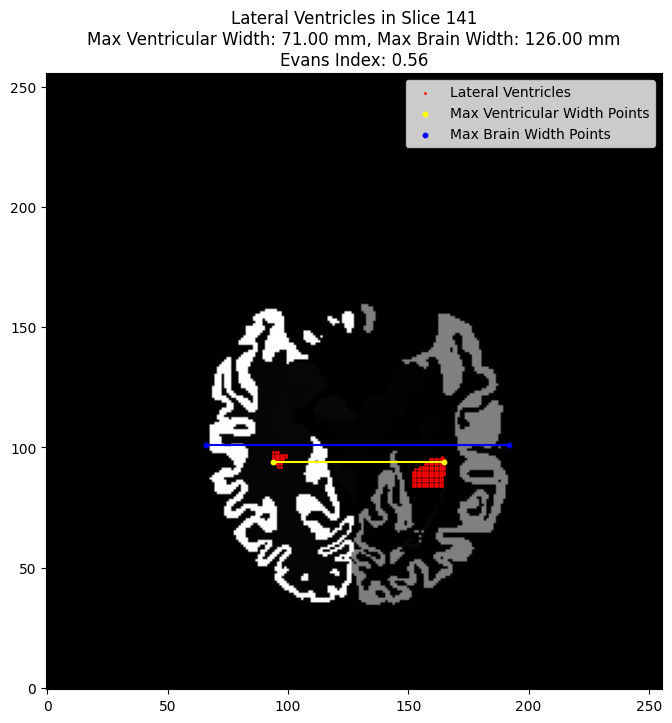

Maximum width of frontal horns in slice 141: 71.00 mm
Maximum left-to-right distance of the brain in slice 141: 126.00 mm
Evans Index: 0.56


In [30]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours

def visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, lv_labels=[4, 43], brain_labels=[2, 41], slice_axis=1, num_intervals=10):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Find the coordinates of the lateral ventricles
    lv_coords = np.argwhere(np.isin(seg_data, lv_labels))
    
    if lv_coords.size == 0:
        print("No lateral ventricles found.")
        return
    
    # Find the coordinates of the brain regions
    brain_coords = np.argwhere(np.isin(seg_data, brain_labels))
    
    if brain_coords.size == 0:
        print("No brain regions found.")
        return
    
    # Determine the total number of slices along the specified axis
    num_slices = seg_data.shape[slice_axis]
    print(f"Total number of slices along axis {slice_axis}: {num_slices}")

    # Generate a list of slices at equal intervals
    slice_range = np.linspace(0, num_slices - 1, num_intervals, dtype=int)
    print(f"Selected slice indices: {slice_range}")

    max_lv_distance = 0
    max_brain_distance = 0
    best_slice_idx = None
    best_lv_coords = None
    best_brain_coords = None

    for slice_idx in slice_range:
        # Extract the slice
        if slice_axis == 0:
            slice_data = seg_data[slice_idx, :, :]
        elif slice_axis == 1:
            slice_data = seg_data[:, slice_idx, :]
        else:
            slice_data = seg_data[:, :, slice_idx]

        # Find the coordinates of the lateral ventricles and brain regions in this slice
        if slice_axis == 0:
            slice_lv_coords = lv_coords[lv_coords[:, 0] == slice_idx][:, 1:]
            slice_brain_coords = brain_coords[brain_coords[:, 0] == slice_idx][:, 1:]
        elif slice_axis == 1:
            slice_lv_coords = lv_coords[lv_coords[:, 1] == slice_idx][:, [0, 2]]
            slice_brain_coords = brain_coords[brain_coords[:, 1] == slice_idx][:, [0, 2]]
        else:
            slice_lv_coords = lv_coords[lv_coords[:, 2] == slice_idx][:, :2]
            slice_brain_coords = brain_coords[brain_coords[:, 2] == slice_idx][:, :2]

        # Check if there are enough points to consider this slice
        if slice_lv_coords.shape[0] < 2 or slice_brain_coords.shape[0] < 2:
            continue

        # Find upper and lower extremities to determine the midpoint
        max_y = slice_lv_coords[:, 1].max()
        min_y = slice_lv_coords[:, 1].min()
        midpoint_y = (max_y + min_y) / 2

        # Filter points above the midpoint
        upper_lv_coords = slice_lv_coords[slice_lv_coords[:, 1] > midpoint_y]

        # Check if there are enough points above the midpoint
        if upper_lv_coords.shape[0] < 2:
            continue

        # Group points by their y-coordinate to ensure horizontal distance measurement
        y_unique = np.unique(upper_lv_coords[:, 1])
        for y in y_unique:
            y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
            if y_points.shape[0] < 2:
                continue

            # Calculate the horizontal distance between points in this row
            x_coords = y_points[:, 0]
            dist = np.max(x_coords) - np.min(x_coords)
            
            if dist > max_lv_distance:
                max_lv_distance = dist
                y_value = y  # Y-value for horizontal measurement
                best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])
                best_slice_idx = slice_idx

        # Find the maximum left-right distance of the brain contours
        contours = find_contours(slice_data.T, level=0.5)
        for contour in contours:
            max_x = contour[:, 1].max()
            min_x = contour[:, 1].min()
            brain_dist = max_x - min_x
            if brain_dist > max_brain_distance:
                max_brain_distance = brain_dist
                y_value = contour[contour[:, 1] == min_x, 0][0]  # Y-value for horizontal measurement
                best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    # Calculate the Evans Index
    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    # Plot the best slice with both measurements
    if best_slice_idx is not None:
        if slice_axis == 0:
            slice_data = seg_data[best_slice_idx, :, :]
        elif slice_axis == 1:
            slice_data = seg_data[:, best_slice_idx, :]
        else:
            slice_data = seg_data[:, :, best_slice_idx]

        plt.figure(figsize=(8, 8))
        plt.imshow(slice_data.T, cmap='gray', origin='lower')

        # Highlight the lateral ventricles
        plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        # Highlight the maximum width points for the ventricles
        if best_lv_coords is not None:
            plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
            plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

        # Highlight the maximum width points for the brain
        if best_brain_coords is not None:
            plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
            plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

        title = f'Lateral Ventricles in Slice {best_slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
        if evans_index is not None:
            title += f'\nEvans Index: {evans_index:.2f}'

        plt.title(title)
        plt.legend()
        plt.show()

        print(f'Maximum width of frontal horns in slice {best_slice_idx}: {max_lv_distance:.2f} mm')
        print(f'Maximum left-to-right distance of the brain in slice {best_slice_idx}: {max_brain_distance:.2f} mm')
        if evans_index is not None:
            print(f'Evans Index: {evans_index:.2f}')
    else:
        print("No suitable slice found with both lateral ventricles and brain regions.")

# Example usage
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, num_intervals=10)


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours

def visualize_ventricles_in_all_axes(segmentation_path, lv_labels=[4, 43]):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Find the coordinates of the lateral ventricles
    lv_coords = np.argwhere(np.isin(seg_data, lv_labels))
    
    if lv_coords.size == 0:
        print("No lateral ventricles found.")
        return
    
    axes = [0, 1, 2]
    axis_names = ['Sagittal', 'Coronal', 'Axial']

    for axis, axis_name in zip(axes, axis_names):
        num_slices = seg_data.shape[axis]
        print(f"Visualizing {axis_name} slices: total {num_slices} slices")

        for slice_idx in range(num_slices):
            # Extract the slice
            if axis == 0:
                slice_data = seg_data[slice_idx, :, :]
            elif axis == 1:
                slice_data = seg_data[:, slice_idx, :]
            else:
                slice_data = seg_data[:, :, slice_idx]

            # Find the coordinates of the lateral ventricles in this slice
            if axis == 0:
                slice_lv_coords = lv_coords[lv_coords[:, 0] == slice_idx][:, 1:]
            elif axis == 1:
                slice_lv_coords = lv_coords[lv_coords[:, 1] == slice_idx][:, [0, 2]]
            else:
                slice_lv_coords = lv_coords[lv_coords[:, 2] == slice_idx][:, :2]

            # Check if there are enough points to consider this slice
            if slice_lv_coords.shape[0] < 2:
                continue

            # Plot the slice
            plt.figure(figsize=(8, 8))
            plt.imshow(slice_data.T, cmap='gray', origin='lower')

            # Highlight the lateral ventricles
            plt.scatter(slice_lv_coords[:, 0], slice_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

            plt.title(f'{axis_name} Slice {slice_idx}')
            plt.legend()
            plt.show()

# Example usage
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
visualize_ventricles_in_all_axes(segmentation_path)


Slices with connection between lateral ventricles and third ventricle: [126, 132, 133]
Range of y-coordinates (slices) containing the Foramen of Monro: 129 to 130


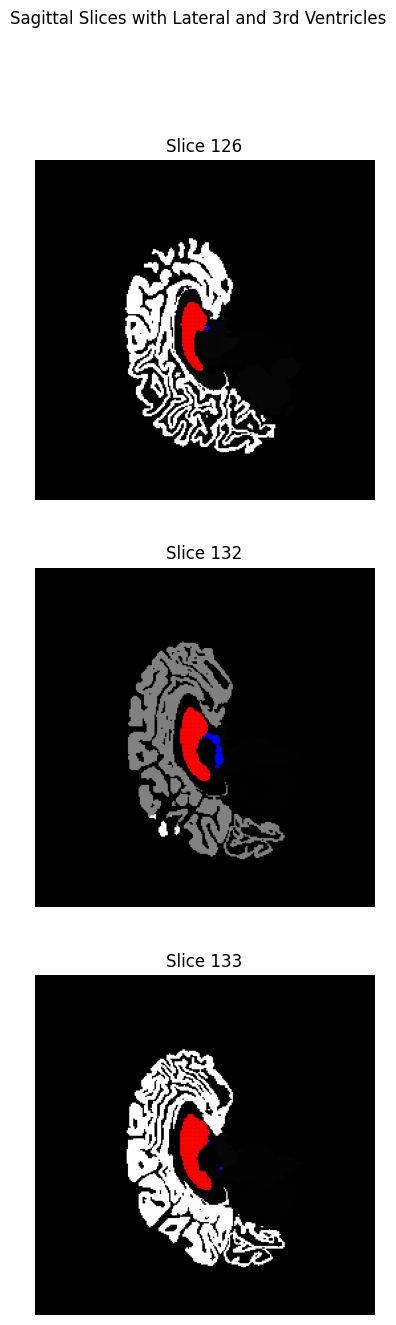

In [6]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import binary_dilation

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14, dilation_iterations=1):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = []

    # To store the range of y-coordinates
    y_min = float('inf')
    y_max = -float('inf')

    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        # Create binary masks for the lateral ventricles and the third ventricle
        lv_mask = np.isin(sagittal_slice, lv_labels)
        third_ventricle_mask = sagittal_slice == third_ventricle_label

        # Dilate the lateral ventricles mask to check for adjacency
        dilated_lv_mask = binary_dilation(lv_mask, iterations=dilation_iterations)

        # Check for intersection
        intersection = np.logical_and(dilated_lv_mask, third_ventricle_mask)

        if np.any(intersection):
            connecting_slices.append(i)
            y_coords = np.argwhere(intersection)[:, 1]  # y-coordinates of the intersection
            y_min = min(y_min, y_coords.min())
            y_max = max(y_max, y_coords.max())

    return connecting_slices, y_min, y_max

def visualize_slices(segmentation_path, slices, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    num_slices = len(slices)
    fig, axes = plt.subplots(num_slices, 1, figsize=(5, num_slices * 5))

    if num_slices == 1:
        axes = [axes]

    for idx, slice_idx in enumerate(slices):
        sagittal_slice = seg_data[slice_idx, :, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(sagittal_slice.T, cmap='gray', origin='lower')
        ax.set_title(f'Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle('Sagittal Slices with Lateral and 3rd Ventricles')
    plt.show()

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, "OAS_0004-1", "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the slices where the Foramen of Monro is located
connecting_slices, y_min, y_max = find_foramen_of_monro_slices(segmentation_path)

print(f"Slices with connection between lateral ventricles and third ventricle: {connecting_slices}")
print(f"Range of y-coordinates (slices) containing the Foramen of Monro: {y_min} to {y_max}")

# Visualize the detected slices
visualize_slices(segmentation_path, connecting_slices)


Slices containing the foramen of Monro: [126, 127, 128, 129, 130, 131, 132, 133]
All slices to visualize: [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]


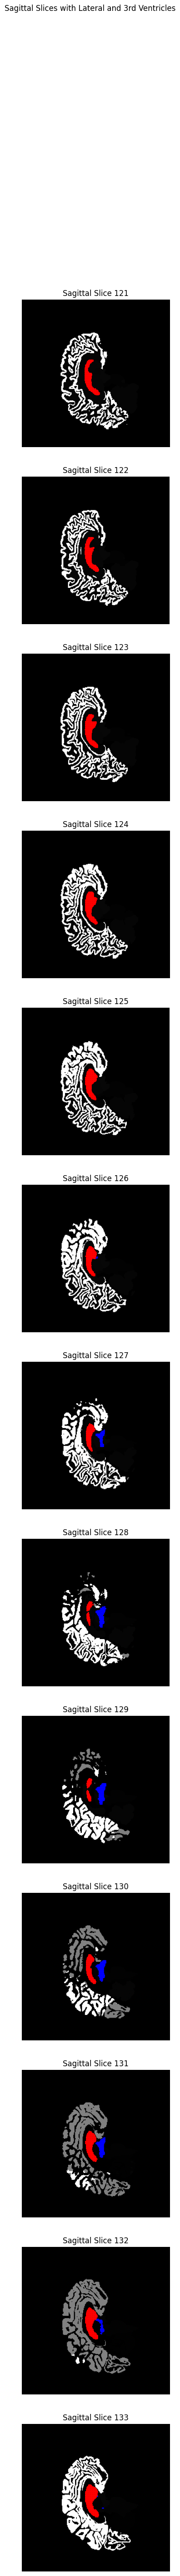

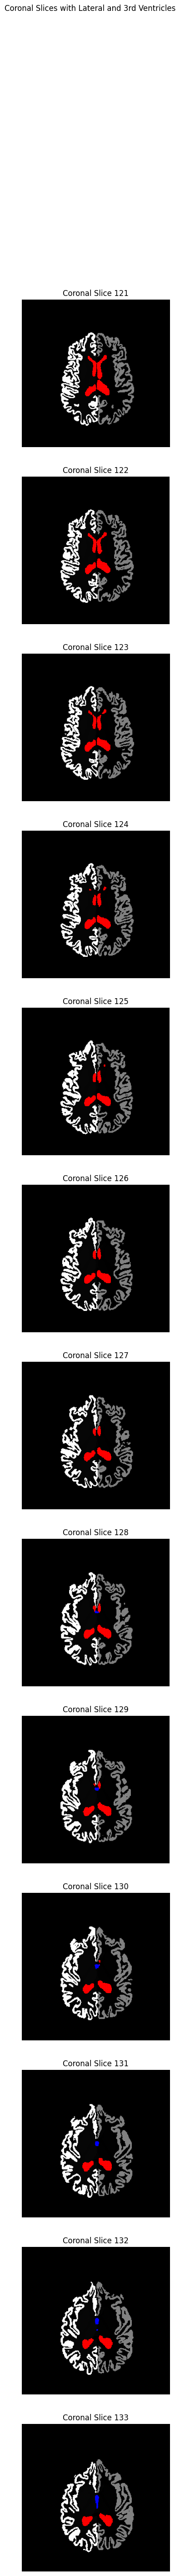

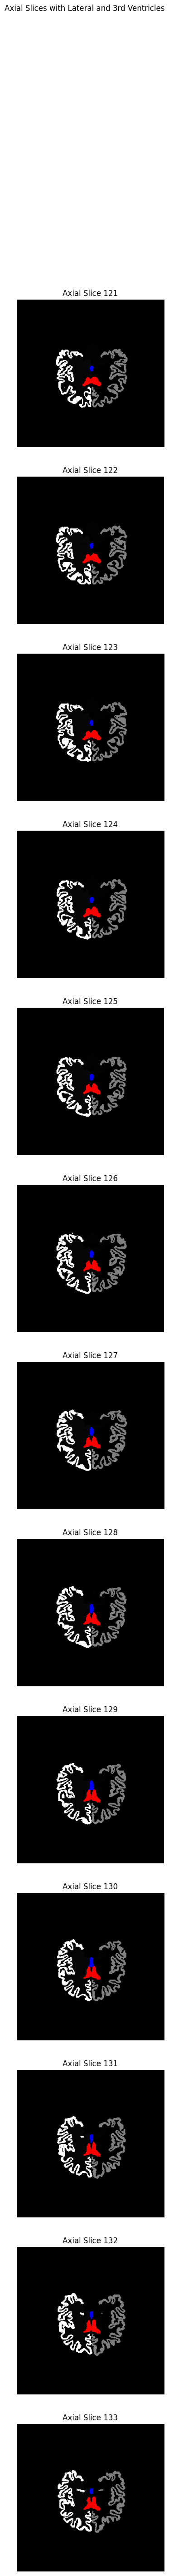

In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = []

    # Iterate through each sagittal slice
    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Check for intersection of voxels between lateral ventricles and third ventricle
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices.append(i)

    return connecting_slices

def visualize_slices(segmentation_path, slices, lv_labels=[4, 43], third_ventricle_label=14, slice_axis='sagittal'):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Visualize each slice
    fig, axes = plt.subplots(len(slices), 1, figsize=(10, len(slices) * 5))

    if len(slices) == 1:
        axes = [axes]

    for idx, slice_idx in enumerate(slices):
        if slice_axis == 'sagittal':
            slice_data = seg_data[slice_idx, :, :]
        elif slice_axis == 'coronal':
            slice_data = seg_data[:, slice_idx, :]
        elif slice_axis == 'axial':
            slice_data = seg_data[:, :, slice_idx]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(slice_data, lv_labels))
        third_ventricle_coords = np.argwhere(slice_data == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(slice_data.T, cmap='gray', origin='lower')
        ax.set_title(f'{slice_axis.capitalize()} Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle(f'{slice_axis.capitalize()} Slices with Lateral and 3rd Ventricles')
    plt.show()

# Example usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0004-1"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the sagittal slices containing the foramen of Monro
connecting_slices = find_foramen_of_monro_slices(segmentation_path)

if connecting_slices:
    print(f"Slices containing the foramen of Monro: {connecting_slices}")
    # Add the 5 slices prior to the first identified slice
    start_slice = max(connecting_slices[0] - 5, 0)
    additional_slices = list(range(start_slice, connecting_slices[0]))
    all_slices = additional_slices + connecting_slices
    print(f"All slices to visualize: {all_slices}")
    
    # Visualize the slices in all three axes
    visualize_slices(segmentation_path, all_slices, slice_axis='sagittal')
    visualize_slices(segmentation_path, all_slices, slice_axis='coronal')
    visualize_slices(segmentation_path, all_slices, slice_axis='axial')
else:
    print("No slices found containing the foramen of Monro.")


Slices containing the foramen of Monro: [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
All slices to visualize: [119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]


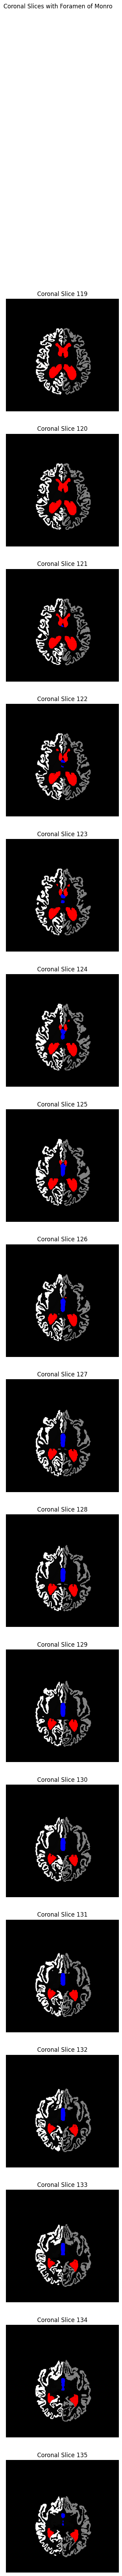

In [16]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = []

    # Iterate through each sagittal slice
    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Check for intersection of voxels between lateral ventricles and third ventricle
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices.append(i)

    return connecting_slices

def visualize_coronal_slices(segmentation_path, slices, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Visualize each slice
    fig, axes = plt.subplots(len(slices), 1, figsize=(10, len(slices) * 5))

    for idx, slice_idx in enumerate(slices):
        coronal_slice = seg_data[:, slice_idx, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(coronal_slice.T, cmap='gray', origin='lower')
        ax.set_title(f'Coronal Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle('Coronal Slices with Foramen of Monro')
    plt.show()

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the coronal slices containing the foramen of Monro
connecting_slices = find_foramen_of_monro_slices(segmentation_path)

if connecting_slices:
    print(f"Slices containing the foramen of Monro: {connecting_slices}")
    # Add the 5 slices prior to the first identified slice
    start_slice = max(connecting_slices[0] - 5, 0)
    additional_slices = list(range(start_slice, connecting_slices[0]))
    all_slices = additional_slices + connecting_slices
    print(f"All slices to visualize: {all_slices}")
    # Visualize the slices
    visualize_coronal_slices(segmentation_path, all_slices)
else:
    print("No slices found containing the foramen of Monro.")


In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours
import os

def visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, lv_labels=[4, 43], brain_labels=[2, 41], slice_idx=122):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Find the coordinates of the lateral ventricles
    lv_coords = np.argwhere(np.isin(seg_data, lv_labels))
    
    if lv_coords.size == 0:
        print("No lateral ventricles found.")
        return
    
    # Find the coordinates of the brain regions
    brain_coords = np.argwhere(np.isin(seg_data, brain_labels))
    
    if brain_coords.size == 0:
        print("No brain regions found.")
        return

    # Extract the specified slice
    slice_data = seg_data[:, slice_idx, :]

    # Find the coordinates of the lateral ventricles and brain regions in this slice
    slice_lv_coords = lv_coords[lv_coords[:, 1] == slice_idx][:, [0, 2]]
    slice_brain_coords = brain_coords[brain_coords[:, 1] == slice_idx][:, [0, 2]]

    if slice_lv_coords.shape[0] < 2 or slice_brain_coords.shape[0] < 2:
        print("Not enough points found in the slice for analysis.")
        return

    # Find upper and lower extremities to determine the midpoint
    max_y = slice_lv_coords[:, 1].max()
    min_y = slice_lv_coords[:, 1].min()
    midpoint_y = (max_y + min_y) / 2

    # Filter points above the midpoint
    upper_lv_coords = slice_lv_coords[slice_lv_coords[:, 1] > midpoint_y]

    if upper_lv_coords.shape[0] < 2:
        print("Not enough points found above the midpoint for analysis.")
        return

    # Group points by their y-coordinate to ensure horizontal distance measurement
    y_unique = np.unique(upper_lv_coords[:, 1])
    max_lv_distance = 0
    best_lv_coords = None

    for y in y_unique:
        y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
        if y_points.shape[0] < 2:
            continue

        x_coords = y_points[:, 0]
        dist = np.max(x_coords) - np.min(x_coords)

        if dist > max_lv_distance:
            max_lv_distance = dist
            y_value = y
            best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])

    # Find the maximum left-right distance of the brain contours
    contours = find_contours(slice_data.T, level=0.5)
    max_brain_distance = 0
    best_brain_coords = None

    for contour in contours:
        max_x = contour[:, 1].max()
        min_x = contour[:, 1].min()
        brain_dist = max_x - min_x
        if brain_dist > max_brain_distance:
            max_brain_distance = brain_dist
            y_value = contour[contour[:, 1] == min_x, 0][0]
            best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    # Calculate the Evans Index
    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    # Plot the slice with both measurements
    plt.figure(figsize=(8, 8))
    plt.imshow(slice_data.T, cmap='gray', origin='lower')

    # Highlight the lateral ventricles
    plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

    # Highlight the maximum width points for the ventricles
    if best_lv_coords is not None:
        plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
        plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

    # Highlight the maximum width points for the brain
    if best_brain_coords is not None:
        plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
        plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

    title = f'Lateral Ventricles in Slice {slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
    if evans_index is not None:
        title += f'\nEvans Index: {evans_index:.2f}'

    plt.title(title)
    plt.legend()
    plt.show()

    print(f'Maximum width of frontal horns in slice {slice_idx}: {max_lv_distance:.2f} mm')
    print(f'Maximum left-to-right distance of the brain in slice {slice_idx}: {max_brain_distance:.2f} mm')
    if evans_index is not None:
        print(f'Evans Index: {evans_index:.2f}')

# Example usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0002-1"

segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, slice_idx=122
                                                       )


Not enough points found in the slice for analysis.


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = {'coronal': [], 'sagittal': []}

    # Check coronal slices
    for i in range(shape[1]):
        coronal_slice = seg_data[:, i, :]

        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices['coronal'].append(i)

    # Check sagittal slices
    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices['sagittal'].append(i)

    return connecting_slices

def visualize_slices(segmentation_path, slices, axis, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    fig, axes = plt.subplots(len(slices), 1, figsize=(10, len(slices) * 5))

    if len(slices) == 1:
        axes = [axes]

    for idx, slice_idx in enumerate(slices):
        if axis == 'coronal':
            slice_data = seg_data[:, slice_idx, :]
        elif axis == 'sagittal':
            slice_data = seg_data[slice_idx, :, :]

        lv_coords = np.argwhere(np.isin(slice_data, lv_labels))
        third_ventricle_coords = np.argwhere(slice_data == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(slice_data.T, cmap='gray', origin='lower')
        ax.set_title(f'{axis.capitalize()} Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle(f'{axis.capitalize()} Slices with Foramen of Monro')
    plt.show()

def find_matching_coronal_slices(connecting_slices, lv_labels, third_ventricle_label, segmentation_path):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    coronal_slices = connecting_slices['coronal']
    sagittal_slices = connecting_slices['sagittal']

    matched_coronal_slices = []

    for sag_slice in sagittal_slices:
        sagittal_data = seg_data[sag_slice, :, :]
        lv_coords = np.argwhere(np.isin(sagittal_data, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_data == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Find coronal slice intersection
            for cor_slice in coronal_slices:
                coronal_data = seg_data[:, cor_slice, :]
                coronal_lv_coords = np.argwhere(np.isin(coronal_data, lv_labels))
                coronal_third_ventricle_coords = np.argwhere(coronal_data == third_ventricle_label)

                if coronal_lv_coords.size > 0 and coronal_third_ventricle_coords.size > 0:
                    if np.any(np.isin(coronal_lv_coords[:, 1], third_ventricle_coords[:, 0])):
                        matched_coronal_slices.append(cor_slice)
                        break  # Stop after the first match is found

    return matched_coronal_slices

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0002-1"

segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

connecting_slices = find_foramen_of_monro_slices(segmentation_path)

if connecting_slices['coronal'] and connecting_slices['sagittal']:
    print(f"Coronal slices containing the foramen of Monro: {connecting_slices['coronal']}")
    print(f"Sagittal slices containing the foramen of Monro: {connecting_slices['sagittal']}")

    matched_coronal_slices = find_matching_coronal_slices(connecting_slices, lv_labels=[4, 43], third_ventricle_label=14, segmentation_path=segmentation_path)
    
    if matched_coronal_slices:
        print(f"Matched Coronal slices: {matched_coronal_slices}")
        start_slice = max(matched_coronal_slices[0] - 5, 0)
        additional_slices = list(range(start_slice, matched_coronal_slices[0]))
        all_coronal_slices = additional_slices + matched_coronal_slices
        visualize_slices(segmentation_path, all_coronal_slices, 'coronal')

        start_slice = max(connecting_slices['sagittal'][0] - 5, 0)
        additional_slices = list(range(start_slice, connecting_slices['sagittal'][0]))
        all_sagittal_slices = additional_slices + connecting_slices['sagittal']
        visualize_slices(segmentation_path, all_sagittal_slices, 'sagittal')
    else:
        print("No matched coronal slices found.")
else:
    print("No slices found containing the foramen of Monro in either coronal or sagittal planes.")


No slices found containing the foramen of Monro in either coronal or sagittal planes.


Coronal slice containing the foramen of Monro: 121


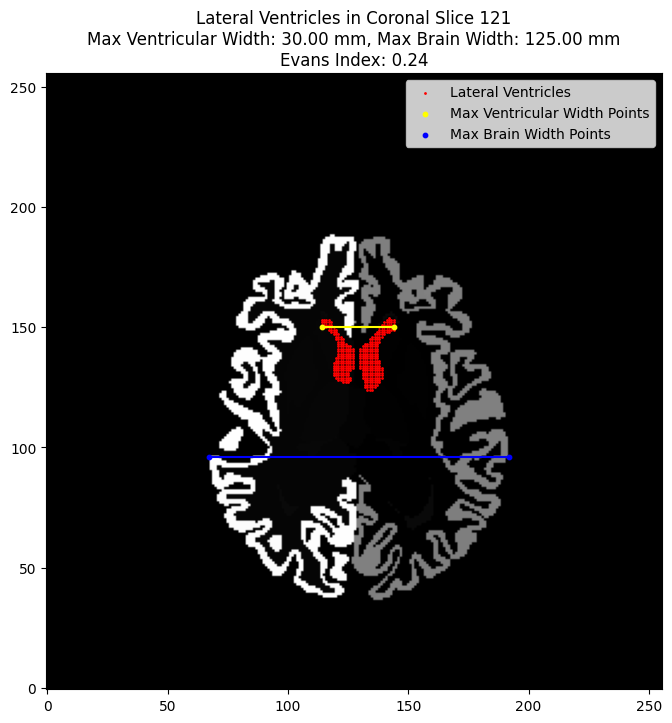

Maximum width of frontal horns in slice 121: 30.00 mm
Maximum left-to-right distance of the brain in slice 121: 125.00 mm
Evans Index: 0.24


In [29]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.measure import find_contours

def find_foramen_of_monro_coronal_slice(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # Iterate through each coronal slice
    for i in range(shape[1]):
        coronal_slice = seg_data[:, i, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Check for intersection of voxels between lateral ventricles and third ventricle
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                return i

    return None

def calculate_and_visualize_evans_index(segmentation_path, coronal_slice_idx, lv_labels=[4, 43], brain_labels=[2, 41]):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Extract the coronal slice
    coronal_slice = seg_data[:, coronal_slice_idx, :]

    # Find coordinates of lateral ventricles and brain regions in this slice
    lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
    brain_coords = np.argwhere(np.isin(coronal_slice, brain_labels))

    if lv_coords.size == 0 or brain_coords.size == 0:
        print("No suitable data found in the specified coronal slice.")
        return

    # Find upper and lower extremities to determine the midpoint
    max_y = lv_coords[:, 1].max()
    min_y = lv_coords[:, 1].min()
    midpoint_y = (max_y + min_y) / 2

    # Filter points above the midpoint
    upper_lv_coords = lv_coords[lv_coords[:, 1] > midpoint_y]

    # Check if there are enough points above the midpoint
    if upper_lv_coords.shape[0] < 2:
        print("Not enough points found in the upper part of the lateral ventricles.")
        return

    # Calculate the maximum horizontal distance of the lateral ventricles
    y_unique = np.unique(upper_lv_coords[:, 1])
    max_lv_distance = 0
    best_lv_coords = None

    for y in y_unique:
        y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
        if y_points.shape[0] < 2:
            continue

        # Calculate the horizontal distance between points in this row
        x_coords = y_points[:, 0]
        dist = np.max(x_coords) - np.min(x_coords)

        if dist > max_lv_distance:
            max_lv_distance = dist
            y_value = y  # Y-value for horizontal measurement
            best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])

    # Find the maximum left-right distance of the brain contours
    contours = find_contours(coronal_slice.T, level=0.5)
    max_brain_distance = 0
    best_brain_coords = None

    for contour in contours:
        max_x = contour[:, 1].max()
        min_x = contour[:, 1].min()
        brain_dist = max_x - min_x
        if brain_dist > max_brain_distance:
            max_brain_distance = brain_dist
            y_value = contour[contour[:, 1] == min_x, 0][0]  # Y-value for horizontal measurement
            best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    # Calculate the Evans Index
    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    # Plot the coronal slice with measurements
    plt.figure(figsize=(8, 8))
    plt.imshow(coronal_slice.T, cmap='gray', origin='lower')

    # Highlight the lateral ventricles
    plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

    # Highlight the maximum width points for the ventricles
    if best_lv_coords is not None:
        plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
        plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

    # Highlight the maximum width points for the brain
    if best_brain_coords is not None:
        plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
        plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

    title = f'Lateral Ventricles in Coronal Slice {coronal_slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
    if evans_index is not None:
        title += f'\nEvans Index: {evans_index:.2f}'

    plt.title(title)
    plt.legend()
    plt.show()

    print(f'Maximum width of frontal horns in slice {coronal_slice_idx}: {max_lv_distance:.2f} mm')
    print(f'Maximum left-to-right distance of the brain in slice {coronal_slice_idx}: {max_brain_distance:.2f} mm')
    if evans_index is not None:
        print(f'Evans Index: {evans_index:.2f}')

# Example usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the coronal slice containing the foramen of Monro
coronal_slice_idx = find_foramen_of_monro_coronal_slice(segmentation_path)

if coronal_slice_idx is not None:
    print(f"Coronal slice containing the foramen of Monro: {coronal_slice_idx}")
    # Calculate and visualize Evans Index for the identified coronal slice
    calculate_and_visualize_evans_index(segmentation_path, coronal_slice_idx)
else:
    print("No coronal slice found containing the foramen of Monro.")


Posterior-most point found at slice index: 127


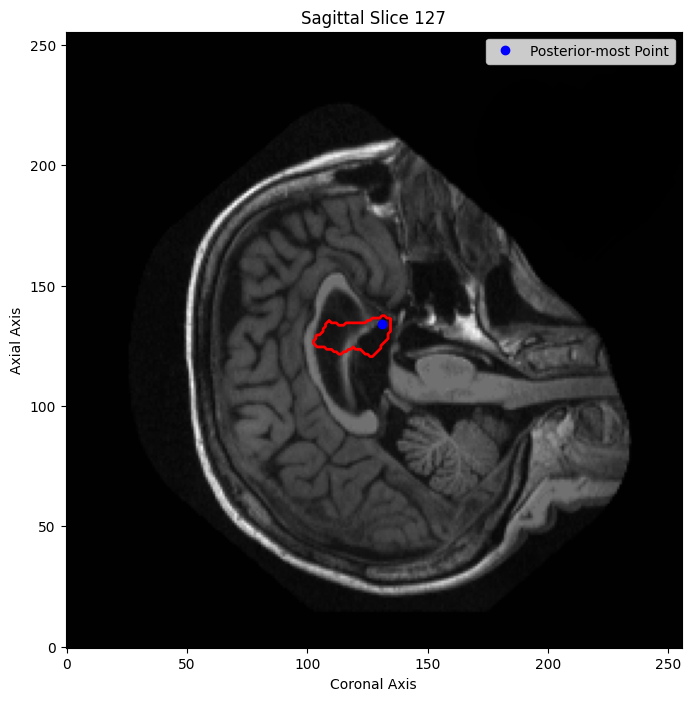

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours
import os

def find_posterior_most_point(segmentation_data, label):
    posterior_most_point = None
    posterior_most_slice = None

    # Iterate through each sagittal slice
    for i in range(segmentation_data.shape[0]):
        sagittal_slice = segmentation_data[i, :, :]

        # Find coordinates of the target structure in this slice
        target_coords = np.argwhere(sagittal_slice == label)

        if target_coords.size > 0:
            # Find the posterior-most point in this slice
            slice_posterior_most_point = target_coords[np.argmax(target_coords[:, 1])]
            if (posterior_most_point is None) or (slice_posterior_most_point[1] > posterior_most_point[1]):
                posterior_most_point = slice_posterior_most_point
                posterior_most_slice = i

    return posterior_most_point, posterior_most_slice

def visualize_posterior_most_point(segmentation_path, orig_path, posterior_most_point, posterior_most_slice, label):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Load the original MRI data
    orig_img = nib.load(orig_path)
    orig_data = orig_img.get_fdata()

    sagittal_slice = seg_data[posterior_most_slice, :, :]
    orig_slice_data = orig_data[posterior_most_slice, :, :]

    # Find contours of the third ventricle in this slice
    target_mask = sagittal_slice == label
    contours = find_contours(target_mask.T, level=0.5)

    plt.figure(figsize=(8, 8))
    plt.imshow(orig_slice_data.T, cmap='gray', origin='lower')
    plt.title(f'Sagittal Slice {posterior_most_slice}')
    plt.xlabel('Coronal Axis')
    plt.ylabel('Axial Axis')

    for contour in contours:
        plt.plot(contour[:, 0], contour[:, 1], 'r-', linewidth=2)

    if posterior_most_point is not None:
        plt.plot(posterior_most_point[0], posterior_most_point[1], 'bo', label='Posterior-most Point')

    plt.legend()
    plt.show()

# Example usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

# Construct the paths dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
orig_path = os.path.join(fastsurferdir, subject, "mri", "orig.mgz")

# Define the label for the third ventricle
third_ventricle_label = 14

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Find the posterior-most point of the third ventricle in the segmentation data
posterior_most_point, posterior_most_slice = find_posterior_most_point(seg_data, third_ventricle_label)

if posterior_most_point is not None:
    print(f"Posterior-most point found at slice index: {posterior_most_slice}")
    visualize_posterior_most_point(segmentation_path, orig_path, posterior_most_point, posterior_most_slice, third_ventricle_label)
else:
    print("No suitable points found in the segmentation data.")


Axial slice containing the foramen of Monro: 126


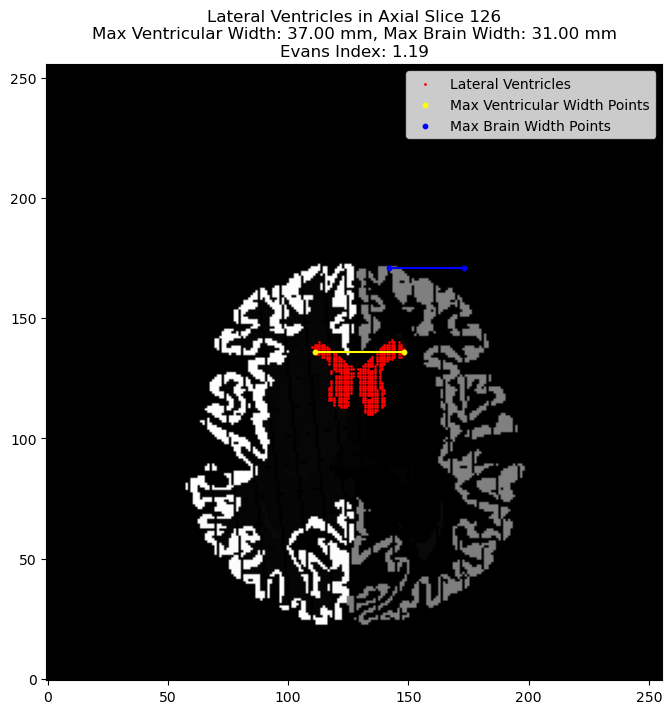

Maximum width of frontal horns in slice 126: 37.00 mm
Maximum left-to-right distance of the brain in slice 126: 31.00 mm
Evans Index: 1.19


In [23]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.measure import find_contours

def load_talairach_transform(transform_path):
    with open(transform_path, 'r') as file:
        lines = file.readlines()
        matrix = np.array([list(map(float, line.split())) for line in lines[5:9]])
    return matrix

def apply_transform(segmentation_data, transform_matrix):
    shape = segmentation_data.shape
    transformed_data = np.zeros_like(segmentation_data)
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                coords = np.array([x, y, z, 1])
                transformed_coords = np.dot(transform_matrix, coords)
                transformed_coords = transformed_coords[:3] / transformed_coords[3]
                transformed_coords = np.round(transformed_coords).astype(int)
                if np.all(transformed_coords >= 0) and np.all(transformed_coords < shape):
                    transformed_data[tuple(transformed_coords)] = segmentation_data[x, y, z]
    return transformed_data

def find_foramen_of_monro_axial_slice(segmentation_data, lv_labels=[4, 43], third_ventricle_label=14):
    shape = segmentation_data.shape
    for i in range(shape[1]):
        axial_slice = segmentation_data[:, i, :]
        lv_coords = np.argwhere(np.isin(axial_slice, lv_labels))
        third_ventricle_coords = np.argwhere(axial_slice == third_ventricle_label)
        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                return i
    return None

def calculate_and_visualize_evans_index(transformed_data, axial_slice_idx, lv_labels=[4, 43], brain_labels=[2, 41]):
    axial_slice = transformed_data[:, axial_slice_idx, :]

    lv_coords = np.argwhere(np.isin(axial_slice, lv_labels))
    brain_coords = np.argwhere(np.isin(axial_slice, brain_labels))

    if lv_coords.size == 0 or brain_coords.size == 0:
        print("No suitable data found in the specified axial slice.")
        return

    max_y = lv_coords[:, 1].max()
    min_y = lv_coords[:, 1].min()
    midpoint_y = (max_y + min_y) / 2
    upper_lv_coords = lv_coords[lv_coords[:, 1] > midpoint_y]

    if upper_lv_coords.shape[0] < 2:
        print("Not enough points found in the upper part of the lateral ventricles.")
        return

    y_unique = np.unique(upper_lv_coords[:, 1])
    max_lv_distance = 0
    best_lv_coords = None

    for y in y_unique:
        y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
        if y_points.shape[0] < 2:
            continue
        x_coords = y_points[:, 0]
        dist = np.max(x_coords) - np.min(x_coords)

        if dist > max_lv_distance:
            max_lv_distance = dist
            y_value = y
            best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])

    contours = find_contours(axial_slice.T, level=0.5)  # Adjust the level if needed
    max_brain_distance = 0
    best_brain_coords = None

    for contour in contours:
        max_x = contour[:, 1].max()
        min_x = contour[:, 1].min()
        brain_dist = max_x - min_x
        if brain_dist > max_brain_distance:
            max_brain_distance = brain_dist
            y_value = contour[contour[:, 1] == min_x, 0][0]
            best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    plt.figure(figsize=(8, 8))
    plt.imshow(axial_slice.T, cmap='gray', origin='lower')

    plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

    if best_lv_coords is not None:
        plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
        plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

    if best_brain_coords is not None:
        plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
        plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

    title = f'Lateral Ventricles in Axial Slice {axial_slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
    if evans_index is not None:
        title += f'\nEvans Index: {evans_index:.2f}'

    plt.title(title)
    plt.legend()
    plt.show()

    print(f'Maximum width of frontal horns in slice {axial_slice_idx}: {max_lv_distance:.2f} mm')
    print(f'Maximum left-to-right distance of the brain in slice {axial_slice_idx}: {max_brain_distance:.2f} mm')
    if evans_index is not None:
        print(f'Evans Index: {evans_index:.2f}')

# Construct the path dynamically
fastsurferdir = "/home/sasaigoli/Documents/FastSurfer-Analysis"
subject = "OAS1_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri", "transforms", "talairach.lta")

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Load Talairach transform
transform_matrix = load_talairach_transform(transform_path)

# Apply transform to segmentation data
transformed_data = apply_transform(seg_data, transform_matrix)

# Optionally, save the transformed data
output_path = os.path.join(fastsurferdir, subject, "mri", "transformed_aparc.DKTatlas+aseg.deep.mgz")
# save_transformed_data(transformed_data, output_path, seg_img.affine)

# Find the axial slice containing the foramen of Monro in the transformed data
axial_slice_idx = find_foramen_of_monro_axial_slice(transformed_data)

if axial_slice_idx is not None:
    print(f"Axial slice containing the foramen of Monro: {axial_slice_idx}")
    calculate_and_visualize_evans_index(transformed_data, axial_slice_idx)
else:
    print("No axial slice found containing the foramen of Monro.")


Axial slice containing the foramen of Monro: 126


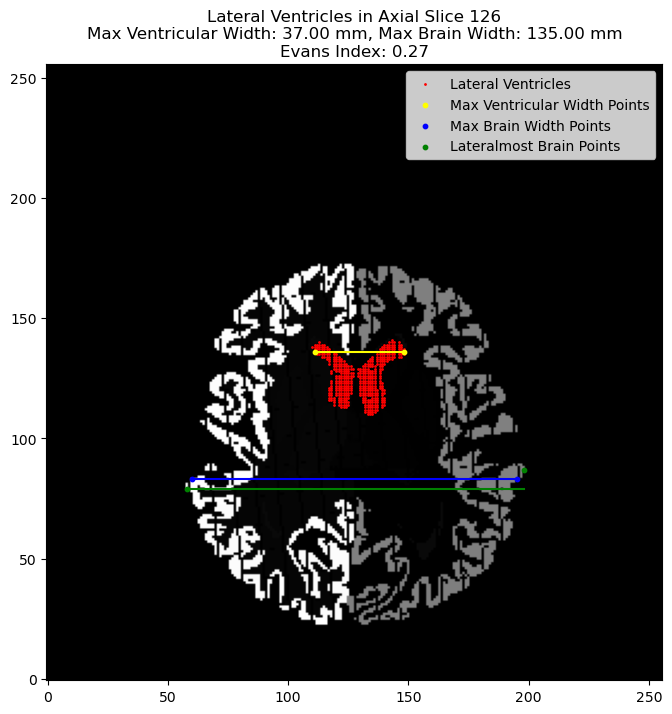

Maximum width of frontal horns in slice 126: 37.00 mm
Maximum left-to-right distance of the brain in slice 126: 135.00 mm
Evans Index: 0.27


In [27]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.measure import find_contours

def load_talairach_transform(transform_path):
    with open(transform_path, 'r') as file:
        lines = file.readlines()
        matrix = np.array([list(map(float, line.split())) for line in lines[5:9]])
    return matrix

def apply_transform(segmentation_data, transform_matrix):
    shape = segmentation_data.shape
    transformed_data = np.zeros_like(segmentation_data)
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                coords = np.array([x, y, z, 1])
                transformed_coords = np.dot(transform_matrix, coords)
                transformed_coords = transformed_coords[:3] / transformed_coords[3]
                transformed_coords = np.round(transformed_coords).astype(int)
                if np.all(transformed_coords >= 0) and np.all(transformed_coords < shape):
                    transformed_data[tuple(transformed_coords)] = segmentation_data[x, y, z]
    return transformed_data

def find_foramen_of_monro_axial_slice(segmentation_data, lv_labels=[4, 43], third_ventricle_label=14):
    shape = segmentation_data.shape
    for i in range(shape[1]):
        axial_slice = segmentation_data[:, i, :]
        lv_coords = np.argwhere(np.isin(axial_slice, lv_labels))
        third_ventricle_coords = np.argwhere(axial_slice == third_ventricle_label)
        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                return i
    return None

def find_max_brain_width(axial_slice):
    max_width = 0
    best_coords = None
    lateral_most_coords = []

    for y in range(axial_slice.shape[1]):
        row = axial_slice[:, y]
        brain_coords = np.argwhere(row > 0)
        
        if brain_coords.size > 0:
            min_x = brain_coords.min()
            max_x = brain_coords.max()
            width = max_x - min_x

            if width > max_width:
                max_width = width
                best_coords = [(min_x, y), (max_x, y)]

            # Track the lateralmost points
            if not lateral_most_coords or min_x < lateral_most_coords[0][0]:
                lateral_most_coords = [(min_x, y), lateral_most_coords[1] if lateral_most_coords else (max_x, y)]
            if not lateral_most_coords or max_x > lateral_most_coords[1][0]:
                lateral_most_coords = [lateral_most_coords[0] if lateral_most_coords else (min_x, y), (max_x, y)]

    return max_width, best_coords, lateral_most_coords

def calculate_and_visualize_evans_index(transformed_data, axial_slice_idx, lv_labels=[4, 43]):
    axial_slice = transformed_data[:, axial_slice_idx, :]
    lv_coords = np.argwhere(np.isin(axial_slice, lv_labels))

    if lv_coords.size == 0:
        print("No suitable data found in the specified axial slice.")
        return

    max_y = lv_coords[:, 1].max()
    min_y = lv_coords[:, 1].min()
    midpoint_y = (max_y + min_y) / 2
    upper_lv_coords = lv_coords[lv_coords[:, 1] > midpoint_y]

    if upper_lv_coords.shape[0] < 2:
        print("Not enough points found in the upper part of the lateral ventricles.")
        return

    y_unique = np.unique(upper_lv_coords[:, 1])
    max_lv_distance = 0
    best_lv_coords = None

    for y in y_unique:
        y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
        if y_points.shape[0] < 2:
            continue
        x_coords = y_points[:, 0]
        dist = np.max(x_coords) - np.min(x_coords)

        if dist > max_lv_distance:
            max_lv_distance = dist
            y_value = y
            best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])

    max_brain_distance, best_brain_coords, lateral_most_coords = find_max_brain_width(axial_slice)

    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    plt.figure(figsize=(8, 8))
    plt.imshow(axial_slice.T, cmap='gray', origin='lower')

    plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

    if best_lv_coords is not None:
        plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
        plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

    if best_brain_coords is not None:
        plt.scatter(*zip(*best_brain_coords), c='blue', s=10, label='Max Brain Width Points')
        plt.plot(*zip(*best_brain_coords), c='blue')

    if lateral_most_coords is not None:
        plt.scatter(*zip(*lateral_most_coords), c='green', s=10, label='Lateralmost Brain Points')
        # Draw a horizontal line between the lateralmost points
        plt.plot([lateral_most_coords[0][0], lateral_most_coords[1][0]], 
                 [lateral_most_coords[0][1], lateral_most_coords[0][1]], c='green')

    title = f'Lateral Ventricles in Axial Slice {axial_slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
    if evans_index is not None:
        title += f'\nEvans Index: {evans_index:.2f}'

    plt.title(title)
    plt.legend()
    plt.show()

    print(f'Maximum width of frontal horns in slice {axial_slice_idx}: {max_lv_distance:.2f} mm')
    print(f'Maximum left-to-right distance of the brain in slice {axial_slice_idx}: {max_brain_distance:.2f} mm')
    if evans_index is not None:
        print(f'Evans Index: {evans_index:.2f}')

# Construct the path dynamically
fastsurferdir = "/home/sasaigoli/Documents/FastSurfer-Analysis"
subject = "OAS1_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri", "transforms", "talairach.lta")

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Load Talairach transform
transform_matrix = load_talairach_transform(transform_path)

# Apply transform to segmentation data
transformed_data = apply_transform(seg_data, transform_matrix)

# Optionally, save the transformed data
output_path = os.path.join(fastsurferdir, subject, "mri", "transformed_aparc.DKTatlas+aseg.deep.mgz")
# save_transformed_data(transformed_data, output_path, seg_img.affine)

# Find the axial slice containing the foramen of Monro in the transformed data
axial_slice_idx = find_foramen_of_monro_axial_slice(transformed_data)

if axial_slice_idx is not None:
    print(f"Axial slice containing the foramen of Monro: {axial_slice_idx}")
    calculate_and_visualize_evans_index(transformed_data, axial_slice_idx)
else:
    print("No axial slice found containing the foramen of Monro.")


In [28]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def load_talairach_transform(transform_path):
    with open(transform_path, 'r') as file:
        lines = file.readlines()
        matrix = np.array([list(map(float, line.split())) for line in lines[5:9]])
    return matrix

def apply_transform(image_data, transform_matrix):
    shape = image_data.shape
    transformed_data = np.zeros_like(image_data)
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                coords = np.array([x, y, z, 1])
                transformed_coords = np.dot(transform_matrix, coords)
                transformed_coords = transformed_coords[:3] / transformed_coords[3]
                transformed_coords = np.round(transformed_coords).astype(int)
                if np.all(transformed_coords >= 0) and np.all(transformed_coords < shape):
                    transformed_data[tuple(transformed_coords)] = image_data[x, y, z]
    return transformed_data

def visualize_ac_and_third_ventricle(transformed_data, ac_label=969, third_ventricle_label=14):
    # Find the slice containing the AC label
    ac_coords = np.argwhere(transformed_data == ac_label)
    
    if ac_coords.size == 0:
        print("Anterior Commissure label not found.")
        return

    # Assuming that AC coordinates are approximately at the same level, use the first found
    ac_coord = ac_coords[0]
    slice_idx = ac_coord[2]  # Assume the slice index is the third coordinate in the array

    plt.figure(figsize=(8, 8))
    plt.imshow(transformed_data[:, :, slice_idx].T, cmap='gray', origin='lower')
    plt.title(f'Slice with AC at index {slice_idx}')
    plt.colorbar()

    # Highlight the AC
    plt.scatter(ac_coord[0], ac_coord[1], c='red', s=10, label='Anterior Commissure')

    # Highlight the third ventricle
    third_ventricle_coords = np.argwhere(transformed_data[:, :, slice_idx] == third_ventricle_label)
    if third_ventricle_coords.size > 0:
        plt.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.legend()
    plt.show()

# Load data
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri", "transforms", "talairach.lta")

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Load Talairach transform
transform_matrix = load_talairach_transform(transform_path)

# Apply transform to segmentation data
transformed_data = apply_transform(seg_data, transform_matrix)

# Visualize AC and Third Ventricle
visualize_ac_and_third_ventricle(transformed_data)


Anterior Commissure label not found.


In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def load_talairach_transform(transform_path):
    with open(transform_path, 'r') as file:
        lines = file.readlines()
        matrix = np.array([list(map(float, line.split())) for line in lines[5:9]])
    return matrix

def apply_transform(segmentation_data, transform_matrix):
    shape = segmentation_data.shape
    transformed_data = np.zeros_like(segmentation_data)
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                coords = np.array([x, y, z, 1])
                transformed_coords = np.dot(transform_matrix, coords)
                transformed_coords = transformed_coords[:3] / transformed_coords[3]
                transformed_coords = np.round(transformed_coords).astype(int)
                if np.all(transformed_coords >= 0) and np.all(transformed_coords < shape):
                    transformed_data[tuple(transformed_coords)] = segmentation_data[x, y, z]
    return transformed_data

def find_label_coords(segmentation_data, label):
    coords = np.argwhere(segmentation_data == label)
    return coords

def visualize_posteriormost_point(transformed_data, ac_coords, lv_coords, third_ventricle_coords, posterior_most_third_ventricle):
    plt.figure(figsize=(8, 8))
    plt.imshow(transformed_data[:, :, int(ac_coords[0][2])].T, cmap='gray', origin='lower')
    plt.scatter(ac_coords[:, 0], ac_coords[:, 1], c='blue', s=1, label='AC')
    plt.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')
    plt.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='green', s=1, label='Third Ventricle')
    plt.scatter(posterior_most_third_ventricle[0], posterior_most_third_ventricle[1], c='yellow', s=10, label='Posteriormost Point of Third Ventricle')
    plt.legend()
    plt.title('AC, Lateral Ventricles, Third Ventricle, and Posterior-most Point')
    plt.show()

# File paths
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer-Analysis"
subject = "OAS_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri", "transforms", "talairach.lta")

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Load Talairach transform
transform_matrix = load_talairach_transform(transform_path)

# Apply transform to segmentation data
transformed_data = apply_transform(seg_data, transform_matrix)

# Identify the coordinates of the AC (label 969), lateral ventricles, and third ventricle
ac_label = 969
lv_labels = [4, 43]
third_ventricle_label = 14

ac_coords = find_label_coords(transformed_data, ac_label)
lv_coords = find_label_coords(transformed_data, lv_labels)
third_ventricle_coords = find_label_coords(transformed_data, third_ventricle_label)

# Find the posterior-most point of the third ventricle
posterior_most_third_ventricle = third_ventricle_coords[np.argmax(third_ventricle_coords[:, 1])]

# Visualize
visualize_posteriormost_point(transformed_data, ac_coords, lv_coords, third_ventricle_coords, posterior_most_third_ventricle)


ValueError: operands could not be broadcast together with shapes (256,256,256) (2,) 

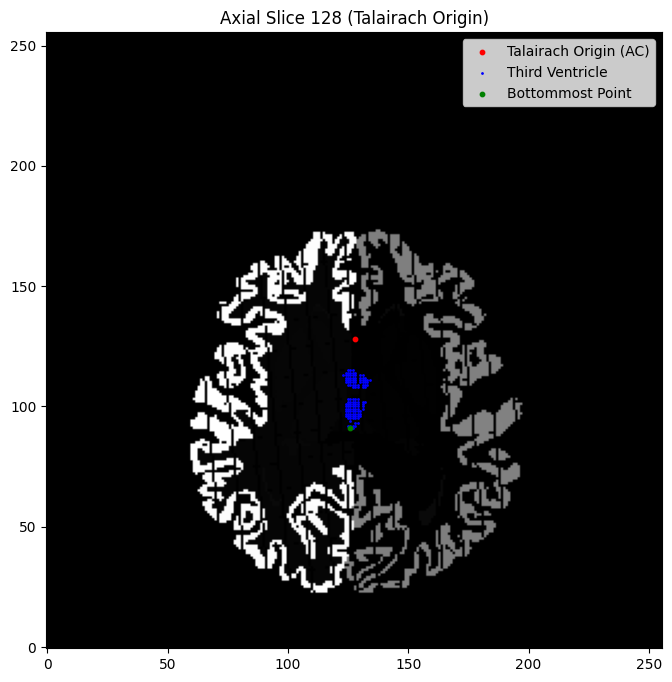

AC Point: (128, 128, 128)
PC Point: (126, 128, 91)


In [30]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def load_talairach_transform(transform_path):
    with open(transform_path, 'r') as file:
        lines = file.readlines()
        matrix = np.array([list(map(float, line.split())) for line in lines[5:9]])
    return matrix

def apply_transform(segmentation_data, transform_matrix):
    shape = segmentation_data.shape
    transformed_data = np.zeros_like(segmentation_data)
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                coords = np.array([x, y, z, 1])
                transformed_coords = np.dot(transform_matrix, coords)
                transformed_coords = transformed_coords[:3] / transformed_coords[3]
                transformed_coords = np.round(transformed_coords).astype(int)
                if np.all(transformed_coords >= 0) and np.all(transformed_coords < shape):
                    transformed_data[tuple(transformed_coords)] = segmentation_data[x, y, z]
    return transformed_data

def visualize_talairach_origin(segmentation_data):
    origin = [128, 128, 128]  # Talairach space origin in FreeSurfer is typically at (128, 128, 128)
    axial_slice = segmentation_data[:, origin[1], :]

    # Extract third ventricle data
    third_ventricle_coords = np.column_stack(np.where(axial_slice == 14))

    # Find the bottommost point (maximum y value)
    if third_ventricle_coords.size > 0:
        bottommost_point = third_ventricle_coords[np.argmin(third_ventricle_coords[:, 1])]
        pc_point = (bottommost_point[0], origin[1], bottommost_point[1])
    else:
        bottommost_point = None
        pc_point = None

    plt.figure(figsize=(8, 8))
    plt.imshow(axial_slice.T, cmap='gray', origin='lower')
    plt.scatter(origin[0], origin[2], c='red', s=10, label='Talairach Origin (AC)')
    if third_ventricle_coords.size > 0:
        plt.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')
        plt.scatter(bottommost_point[0], bottommost_point[1], c='green', s=10, label='Bottommost Point')
    plt.title(f'Axial Slice {origin[2]} (Talairach Origin)')
    plt.legend()
    plt.show()

    ac_point = (origin[0], origin[1], origin[2])
    return ac_point, pc_point

# Usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer-Analysis"
subject = "OAS_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri", "transforms", "talairach.lta")

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Load Talairach transform
transform_matrix = load_talairach_transform(transform_path)

# Apply transform to segmentation data
transformed_data = apply_transform(seg_data, transform_matrix)

# Visualize the origin of the Talairach space and get AC and PC points
ac_point, pc_point = visualize_talairach_origin(transformed_data)

print(f"AC Point: {ac_point}")
print(f"PC Point: {pc_point}")


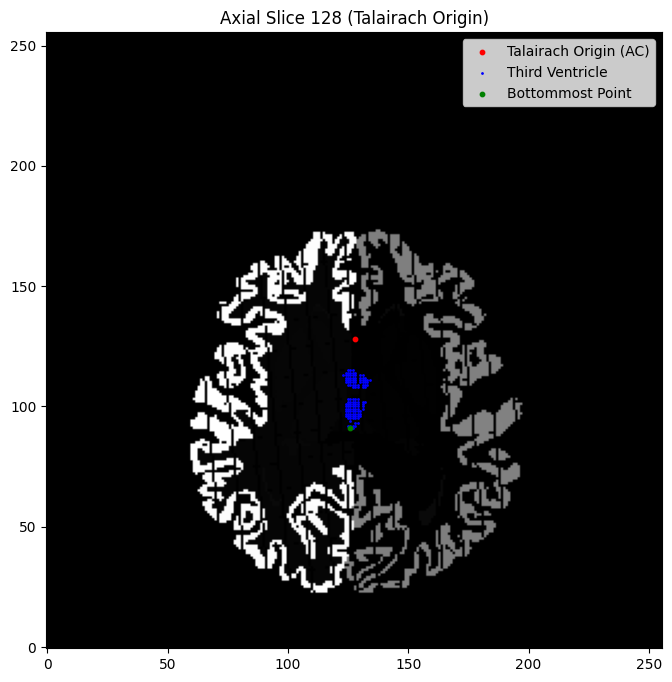

AC Point: (128, 128, 128), Back-translated AC Point: [128 121 142]
PC Point: (126, 128, 91), Back-translated PC Point: [127 125 104]


In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def load_talairach_transform(transform_path):
    with open(transform_path, 'r') as file:
        lines = file.readlines()
        matrix = np.array([list(map(float, line.split())) for line in lines[5:9]])
    return matrix

def apply_transform(segmentation_data, transform_matrix):
    shape = segmentation_data.shape
    transformed_data = np.zeros_like(segmentation_data)
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                coords = np.array([x, y, z, 1])
                transformed_coords = np.dot(transform_matrix, coords)
                transformed_coords = transformed_coords[:3] / transformed_coords[3]
                transformed_coords = np.round(transformed_coords).astype(int)
                if np.all(transformed_coords >= 0) and np.all(transformed_coords < shape):
                    transformed_data[tuple(transformed_coords)] = segmentation_data[x, y, z]
    return transformed_data

def apply_inverse_transform(transformed_coords, transform_matrix):
    # Create the inverse transform matrix
    inverse_matrix = np.linalg.inv(transform_matrix)
    
    # Transform the coordinates
    transformed_coords_homogeneous = np.append(transformed_coords, 1)
    original_coords_homogeneous = np.dot(inverse_matrix, transformed_coords_homogeneous)
    original_coords = original_coords_homogeneous[:3] / original_coords_homogeneous[3]
    
    return np.round(original_coords).astype(int)

def visualize_talairach_origin(segmentation_data):
    origin = [128, 128, 128]  # Talairach space origin in FreeSurfer is typically at (128, 128, 128)
    axial_slice = segmentation_data[:, origin[1], :]

    # Extract third ventricle data
    third_ventricle_coords = np.column_stack(np.where(axial_slice == 14))

    # Find the bottommost point (maximum y value)
    if third_ventricle_coords.size > 0:
        bottommost_point = third_ventricle_coords[np.argmin(third_ventricle_coords[:, 1])]
        pc_point = (bottommost_point[0], origin[1], bottommost_point[1])
    else:
        bottommost_point = None
        pc_point = None

    plt.figure(figsize=(8, 8))
    plt.imshow(axial_slice.T, cmap='gray', origin='lower')
    plt.scatter(origin[0], origin[2], c='red', s=10, label='Talairach Origin (AC)')
    if third_ventricle_coords.size > 0:
        plt.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')
        plt.scatter(bottommost_point[0], bottommost_point[1], c='green', s=10, label='Bottommost Point')
    plt.title(f'Axial Slice {origin[2]} (Talairach Origin)')
    plt.legend()
    plt.show()

    ac_point = (origin[0], origin[1], origin[2])
    return ac_point, pc_point

# Usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer-Analysis"
subject = "OAS_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri", "transforms", "talairach.lta")

# Load segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Load Talairach transform
transform_matrix = load_talairach_transform(transform_path)

# Apply transform to segmentation data
transformed_data = apply_transform(seg_data, transform_matrix)

# Visualize the origin of the Talairach space and get AC and PC points
ac_point, pc_point = visualize_talairach_origin(transformed_data)

# Back-translate AC and PC points
ac_point_orig = apply_inverse_transform(ac_point, transform_matrix)
pc_point_orig = apply_inverse_transform(pc_point, transform_matrix)

print(f"AC Point: {ac_point}, Back-translated AC Point: {ac_point_orig}")
print(f"PC Point: {pc_point}, Back-translated PC Point: {pc_point_orig}")


Above but mark posteriormost point of third ventricle-- indicate PC

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_ac_slice(segmentation_path, ac_label=9):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # Iterate through each axial slice (along the Y-axis) to find the AC
    for i in range(shape[1]):  # Axis 1 corresponds to the axial slices
        axial_slice = seg_data[:, i, :]
        ac_coords = np.argwhere(axial_slice == ac_label)

        if ac_coords.size > 0:
            return i, ac_coords

    return None, None

def visualize_ac_slice(segmentation_path, slice_idx, ac_coords, ac_label=969):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Visualize the slice containing the AC
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    axial_slice = seg_data[:, slice_idx, :]  # Extract the axial slice along the Y-axis
    ax.imshow(axial_slice.T, cmap='gray', origin='lower')
    ax.set_title(f'Axial Slice {slice_idx} containing Anterior Commissure')
    ax.axis('off')

    if ac_coords.size > 0:
        ax.scatter(ac_coords[:, 0], ac_coords[:, 1], c='red', s=1, label='Anterior Commissure')

    plt.legend()
    plt.show()

# Usage
fastsurferdir = "/home/sasaigoli/Documents/FastSurfer-Analysis"
subject = "OAS1_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the axial slice containing the anterior commissure
slice_idx, ac_coords = find_ac_slice(segmentation_path)

if slice_idx is not None:
    print(f"Slice containing the anterior commissure: {slice_idx}")
    visualize_ac_slice(segmentation_path, slice_idx, ac_coords)
else:
    print("No slice found containing the anterior commissure.")


FileNotFoundError: No such file or no access: '/home/sasaigoli/Documents/FastSurfer-Analysis/OAS1_0001-1/mri/aparc.DKTatlas+aseg.deep.mgz'

determine AC-PC vector, backtranslate to orig space from talairach space

In [17]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_ac_pc_coords(segmentation_path, ac_label=969, third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    ac_coords = None
    posteriormost_third_ventricle_coords = None

    # Iterate through each axial slice to find AC and posteriormost third ventricle point
    for i in range(shape[2]):
        axial_slice = seg_data[:, :, i]

        # Find coordinates of anterior commissure in this slice
        ac_coords_in_slice = np.argwhere(axial_slice == ac_label)
        if ac_coords_in_slice.size > 0 and ac_coords is None:
            ac_coords = ac_coords_in_slice[0]

        # Find the posteriormost point of the third ventricle
        third_ventricle_coords_in_slice = np.argwhere(axial_slice == third_ventricle_label)
        if third_ventricle_coords_in_slice.size > 0:
            if (posteriormost_third_ventricle_coords is None or 
                third_ventricle_coords_in_slice[:, 1].max() > posteriormost_third_ventricle_coords[1]):
                posteriormost_third_ventricle_coords = third_ventricle_coords_in_slice[third_ventricle_coords_in_slice[:, 1].argmax()]

    return ac_coords, posteriormost_third_ventricle_coords

def apply_inverse_talairach_transform(coords, transform):
    # Convert to homogeneous coordinates
    coords_homogeneous = np.append(coords, 1)
    # Apply inverse transform
    original_coords = np.dot(transform, coords_homogeneous)
    # Convert back from homogeneous coordinates
    return original_coords[:3]

def visualize_ac_pc_line(seg_img, ac_coords, pc_coords):
    seg_data = seg_img.get_fdata()
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Sagittal view
    axes[0].imshow(seg_data[ac_coords[0], :, :].T, cmap='gray', origin='lower')
    axes[0].plot([ac_coords[1], pc_coords[1]], [ac_coords[2], pc_coords[2]], 'r-')
    axes[0].scatter(ac_coords[1], ac_coords[2], c='red', label='AC', s=50)
    axes[0].scatter(pc_coords[1], pc_coords[2], c='blue', label='PC', s=50)
    axes[0].set_title('Sagittal View')
    axes[0].axis('off')

    # Axial view
    axes[1].imshow(seg_data[:, :, ac_coords[2]], cmap='gray', origin='lower')
    axes[1].plot([ac_coords[0], pc_coords[0]], [ac_coords[1], pc_coords[1]], 'r-')
    axes[1].scatter(ac_coords[0], ac_coords[1], c='red', label='AC', s=50)
    axes[1].scatter(pc_coords[0], pc_coords[1], c='blue', label='PC', s=50)
    axes[1].set_title('Axial View')
    axes[1].axis('off')

    # Coronal view
    axes[2].imshow(seg_data[:, ac_coords[1], :].T, cmap='gray', origin='lower')
    axes[2].plot([ac_coords[0], pc_coords[0]], [ac_coords[2], pc_coords[2]], 'r-')
    axes[2].scatter(ac_coords[0], ac_coords[2], c='red', label='AC', s=50)
    axes[2].scatter(pc_coords[0], pc_coords[2], c='blue', label='PC', s=50)
    axes[2].set_title('Coronal View')
    axes[2].axis('off')

    plt.suptitle('AC-PC Line in Different Views')
    plt.legend()
    plt.show()

# Usage
fastsurferdir = "/home/sasaigoli/Documents/FastSurfer-Analysis"
subject = "OAS1_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
transform_path = os.path.join(fastsurferdir, subject, "mri","transforms","talairach.xfm")

# Load the Talairach transform
transform = nib.load(transform_path).get_fdata()

# Find the AC and PC coordinates in Talairach space
ac_coords, pc_coords = find_ac_pc_coords(segmentation_path)

# Apply the inverse Talairach transform to these coordinates
inverse_transform = np.linalg.inv(transform)
ac_coords_original = apply_inverse_talairach_transform(ac_coords, inverse_transform)
pc_coords_original = apply_inverse_talairach_transform(pc_coords, inverse_transform)

# Visualize the AC-PC line in original space
seg_img = nib.load(segmentation_path)
visualize_ac_pc_line(seg_img, ac_coords_original, pc_coords_original)


ImageFileError: Cannot work out file type of "/home/sasaigoli/Documents/FastSurfer-Analysis/OAS1_0001-1/mri/transforms/talairach.xfm"

In [21]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_ac_slice(segmentation_data, ac_label=969):
    shape = segmentation_data.shape

    for i in range(shape[1]):  # Iterate over axial slices (axis 1)
        axial_slice = segmentation_data[:, i, :]
        ac_coords = np.argwhere(axial_slice == ac_label)
        if ac_coords.size > 0:
            return i, ac_coords

    return None, None

def visualize_ac_slice(segmentation_data, slice_idx, ac_coords, ac_label=9):
    axial_slice = segmentation_data[:, slice_idx, :]

    plt.figure(figsize=(8, 8))
    plt.imshow(axial_slice.T, cmap='gray', origin='lower')
    plt.title(f'Axial Slice {slice_idx} containing Anterior Commissure')
    plt.scatter(ac_coords[:, 0], ac_coords[:, 1], c='red', s=1, label='Anterior Commissure')
    plt.legend()
    plt.show()

# Set the path to the file
fastsurferdir = "/home/sasaigoli/Documents/FastSurfer-Analysis/"
subject = "OAS1_0001-1"
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "hypothalamus_mask.HypVINN.nii.gz")

# Load the segmentation data
seg_img = nib.load(segmentation_path)
seg_data = seg_img.get_fdata()

# Find the axial slice containing the anterior commissure
slice_idx, ac_coords = find_ac_slice(seg_data, ac_label=9)

if slice_idx is not None:
    print(f"Slice containing the anterior commissure: {slice_idx}")
    visualize_ac_slice(seg_data, slice_idx, ac_coords, ac_label=9)
else:
    print("No slice found containing the anterior commissure.")


No slice found containing the anterior commissure.
